# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [188]:
import pandas as pd
import pylab as pl
import urllib
from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.graphics.api import abline_plot
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# download world firearms murder and and ownership from google doc
!wget https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/export?format=csv -O World_firearms_murders_and_ownership.csv

--2018-11-13 15:48:13--  https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/export?format=csv
Resolving docs.google.com (docs.google.com)... 216.58.217.142, 2607:f8b0:4004:80a::200e
Connecting to docs.google.com (docs.google.com)|216.58.217.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘World_firearms_murders_and_ownership.csv’

World_firearms_murd     [ <=>                ]   7.67K  --.-KB/s    in 0s      

2018-11-13 15:48:14 (95.7 MB/s) - ‘World_firearms_murders_and_ownership.csv’ saved [7852]



In [3]:
#download world population
!wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv -O world_population_by_country.zip

--2018-11-13 15:48:14--  http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.202.62.171
Connecting to api.worldbank.org (api.worldbank.org)|52.202.62.171|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79717 (78K) [application/zip]
Saving to: ‘world_population_by_country.zip’

world_population_by 100%[===================>]  77.85K  --.-KB/s    in 0.01s   

2018-11-13 15:48:15 (6.29 MB/s) - ‘world_population_by_country.zip’ saved [79717/79717]



In [4]:
#download world gdp
!wget http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv -O world_gdp.zip

--2018-11-13 15:48:17--  http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.202.62.171
Connecting to api.worldbank.org (api.worldbank.org)|52.202.62.171|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116071 (113K) [application/zip]
Saving to: ‘world_gdp.zip’

world_gdp.zip       100%[===================>] 113.35K  --.-KB/s    in 0.02s   

2018-11-13 15:48:17 (5.16 MB/s) - ‘world_gdp.zip’ saved [116071/116071]



In [5]:
#download number of mass shootings data
url = "data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78"
data = urllib.request.urlretrieve(url,'Number of mass shootings.csv')


In [6]:
#read murder data
cols = ['Country/Territory','Number of homicides by firearm','Average total all civilian firearms']
df_murder = pd.read_csv('World_firearms_murders_and_ownership.csv',usecols=cols)
df_murder.head()

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [7]:
#read massive shooting data
df_mass = pd.read_csv('Number of mass shootings.csv')
df_mass.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [8]:
pop_zip = ZipFile('world_population_by_country.zip')
pop_zip.extractall()

In [9]:
gdp_zip = ZipFile('world_gdp.zip')
gdp_zip.extractall()

In [10]:
#read population data
cols = ["Country Name","2012"]
df_pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv',skiprows=[0,1,2,3],usecols =cols)
df_pop.rename(columns={'2012':'pop'},inplace=True)
df_pop.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [11]:
#read gdp data

cols = ["Country Name","2012"]
df_gdp = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv',skiprows=[0,1,2,3],usecols =cols)
df_gdp.rename(columns={'2012':'gdp'},inplace=True)
df_gdp.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [12]:
#merge downloaded all data sets
df = df_murder.merge(df_mass, left_on="Country/Territory", right_on="Country")
df = df.merge(df_pop,left_on="Country/Territory",right_on='Country Name')
df_ = df.merge(df_gdp,left_on="Country/Territory",right_on='Country Name')
del df_['Country Name_x']
del df_['Country Name_y']
del df_['Country']
df_.rename(columns={'Country/Territory':'Country',
                    'Number of mass shootings (1983-2013)':'Number of mass shootings'},inplace=True)
df_.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,pop,gdp
0,Australia,30.0,3050000.0,15.0,4,22742475.0,1.543411e+12
1,Austria,18.0,2500000.0,30.4,1,8429991.0,4.094252e+11
2,Belgium,70.0,1800000.0,17.2,2,11128246.0,4.978842e+11
3,Canada,173.0,9950000.0,30.8,4,34750545.0,1.824289e+12
4,Denmark,15.0,650000.0,12.0,0,5591572.0,3.271489e+11


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


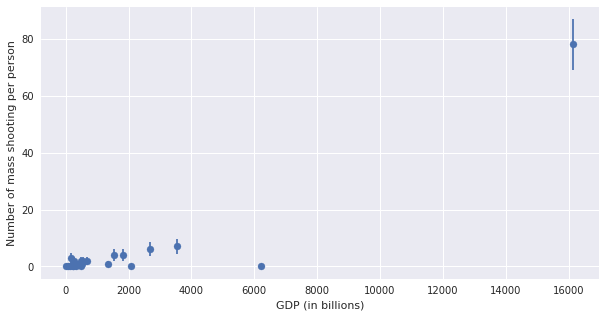

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [30]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP per person, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


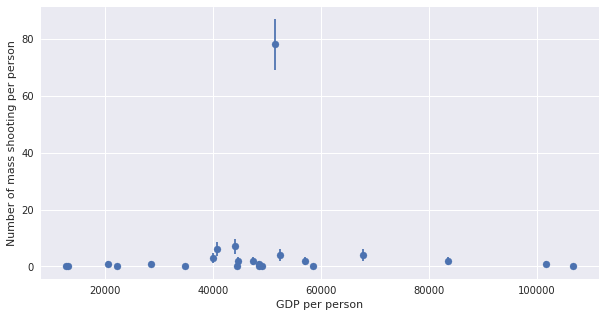

Number of mass shooting vs GDP, errors represent Poisson statistics.
in the case, US is still very significant, 
the value of GDP per person in USA is about the median,
but the number of mass shooting per person is obviously larger others


In [74]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
df_['gdp_per_person'] = df_['gdp']/df_['pop']
scatter = ax.scatter(df_['gdp_per_person'], df_['Number of mass shootings'])
ax.errorbar(df_['gdp_per_person'], df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per person")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
         'in the case, US is still very significant, \n'+
      'the value of GDP per person in USA is about the median,\n' +
      'but the number of mass shooting per person is obviously larger others')

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [66]:
df_.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,pop,gdp,shootingspp,average_num_homicide_per
0,Australia,30.0,3050000.0,15.0,4,22742475.0,1.543411e+12,1.758824e-10,0.000001
1,Austria,18.0,2500000.0,30.4,1,8429991.0,4.094252e+11,1.186241e-10,0.000002
2,Belgium,70.0,1800000.0,17.2,2,11128246.0,4.978842e+11,1.797228e-10,0.000006
3,Canada,173.0,9950000.0,30.8,4,34750545.0,1.824289e+12,1.151061e-10,0.000005
4,Denmark,15.0,650000.0,12.0,0,5591572.0,3.271489e+11,0.000000e+00,0.000003


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


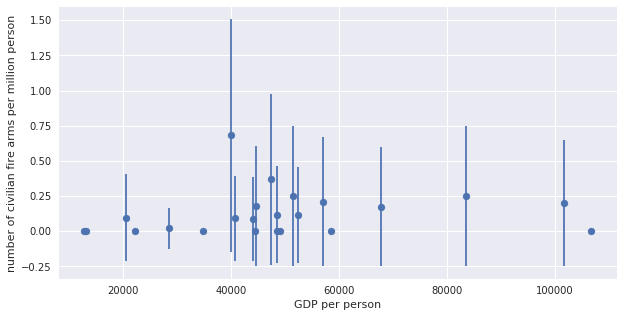

number of civilian fire arms per million person vs GDP per person, 
errors represent Poisson statistics.
in the case, without errorbar, there is no significant different between different countries 
but considering error, there still exsit an outstanding point in the middle


In [85]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e6
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_['gdp_per_person'], df_['shootingspp'])
ax.errorbar(df_['gdp_per_person'], df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp']), fmt = '.')
ax.set_xlabel("GDP per person")
ax.set_ylabel("number of civilian fire arms per million person")
ax.set_ylim()
pl.show()
print ("number of civilian fire arms per million person vs GDP per person, \n" + 
       "errors represent Poisson statistics.\n" + 
        'in the case, without errorbar, there is no significant different between different countries \n'+
      'but considering error, there still exsit an outstanding point in the middle')

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

except one, the rest countries value of average number of homicide by fire arms per person is lower than 0.01, 
 this value in USA is obviouly higher than others


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


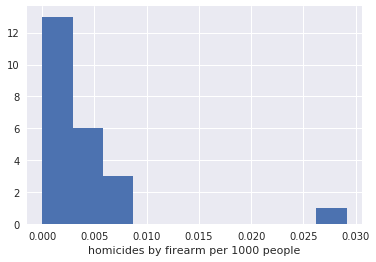

In [88]:
sns.set_style('darkgrid')
df_['average_num_homicide_per'] = df_['Number of homicides by firearm'] / df_['pop'] 
fig, ax = plt.subplots()
ax.hist(df_['average_num_homicide_per'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people')
print('except one, the rest countries value of average number of homicide by fire arms per person is lower than 0.01, \n',
     'this value in USA is obviouly higher than others')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


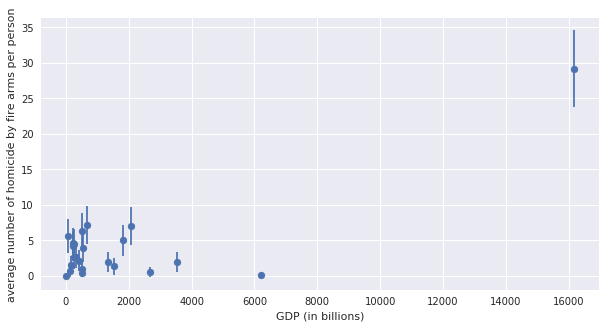

In [43]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['gdp'] / 1e9,df_['average_num_homicide_per'] * 1e6)
ax.errorbar(df_.gdp / 1e9, df_['average_num_homicide_per'] * 1e6, 
            yerr = np.sqrt(df_['average_num_homicide_per'] * 1e6), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("average number of homicide by fire arms per person")
plt.show()

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


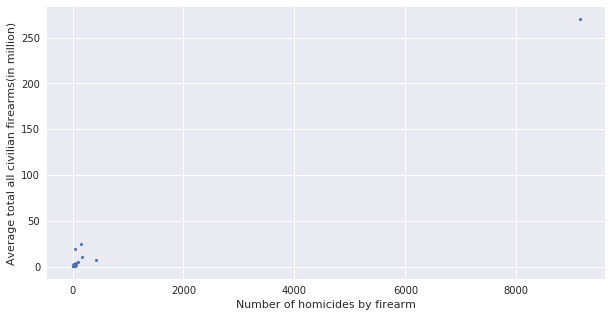

At the top right corner, there is a outlier which the number of homicides by firearm and average total all civilian 
firearms are both much higher than others


In [95]:
plt.figure(figsize=(10,5))
plt.scatter(df_['Number of homicides by firearm'], df_['Average total all civilian firearms']/ 1e6,s=8)
plt.xlabel("Number of homicides by firearm")
plt.ylabel("Average total all civilian firearms(in million)")
plt.show()
print('At the top right corner, there is a outlier which the number of homicides by firearm and average total all civilian \n'+
     'firearms are both much higher than others')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


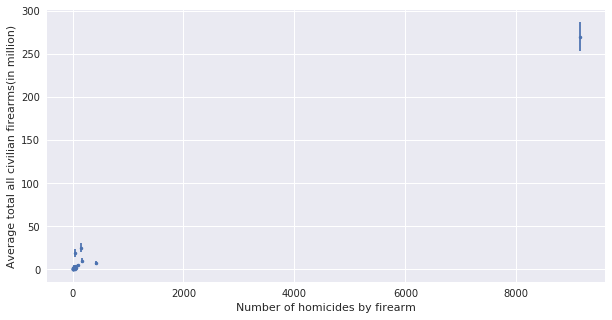

At the top right corner, there is a outlier which the number of homicides by firearm and average total all civilian 
firearms are both much higher than others


In [91]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Number of homicides by firearm'], df_['Average total all civilian firearms']/ 1e6,s=3)
ax.errorbar(df_['Number of homicides by firearm'], df_['Average total all civilian firearms']/ 1e6, 
            yerr = np.sqrt(df_['Average total all civilian firearms'] / 1e6), fmt = '.')
ax.set_xlabel("Number of homicides by firearm")
ax.set_ylabel("Average total all civilian firearms(in million)")
ax.set_ylim()
plt.show()
print('At the top right corner, there is a outlier which the number of homicides by firearm and average total all civilian \n'+
     'firearms are both much higher than others')

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


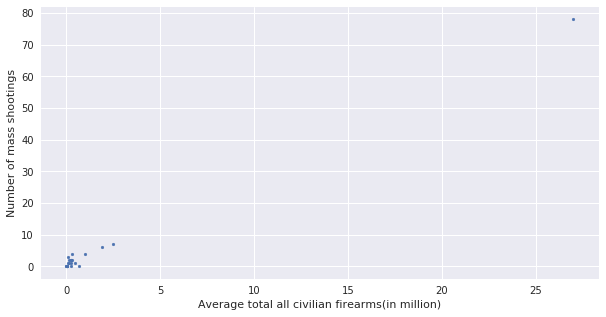

from this plot, we can roughly tell that there is a tendency that the more average total civilian firearms, the more mass shootings 


In [100]:
fig = plt.figure(figsize=(10,5)) 
plt.scatter(df_['Average total all civilian firearms']/ 1e7,df_['Number of mass shootings'] ,s=8)
plt.ylabel("Number of mass shootings")
plt.xlabel("Average total all civilian firearms(in million)")
plt.show()
print('from this plot, we can roughly tell that there is a tendency that the more average total civilian firearms, the more mass shootings ')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


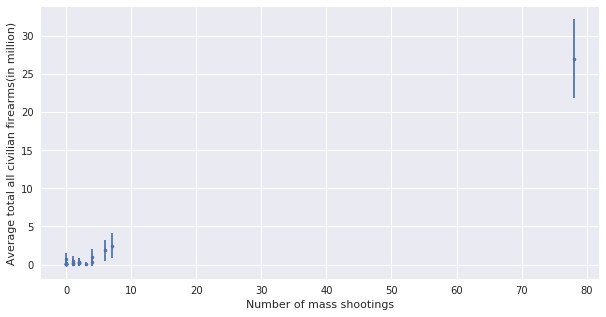

from this plot, we can roughly tell that there is a tendency that the more average total civilian firearms, the more mass shootings 


In [101]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Number of mass shootings'], df_['Average total all civilian firearms']/ 1e7,s=3)
ax.errorbar(df_['Number of mass shootings'], df_['Average total all civilian firearms']/ 1e7, 
            yerr = np.sqrt(df_['Average total all civilian firearms'] / 1e7), fmt = '.')
ax.set_xlabel("Number of mass shootings")
ax.set_ylabel("Average total all civilian firearms(in million)")
ax.set_ylim()
plt.show()
print('from this plot, we can roughly tell that there is a tendency that the more average total civilian firearms, the more mass shootings ')

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [103]:
df_.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,pop,gdp,shootingspp,average_num_homicide_per,gdp_per_person
0,Australia,30.0,3050000.0,15.0,4,22742475.0,1.543411e+12,0.175882,0.000001,67864.689862
1,Austria,18.0,2500000.0,30.4,1,8429991.0,4.094252e+11,0.118624,0.000002,48567.695286
2,Belgium,70.0,1800000.0,17.2,2,11128246.0,4.978842e+11,0.179723,0.000006,44740.583248
3,Canada,173.0,9950000.0,30.8,4,34750545.0,1.824289e+12,0.115106,0.000005,52496.694870
4,Denmark,15.0,650000.0,12.0,0,5591572.0,3.271489e+11,0.000000,0.000003,58507.500210


In [191]:
np.array(x)

array([ 0.13411029,  0.29656022,  0.16175056,  0.28632644,  0.11624638,
        0.44329754,  0.28937041,  0.31084544,  0.22634654,  0.05644955,
        0.28062211,  0.07826882,  0.11756858,  0.005563  ,  0.13184015,
        0.20984097,  0.27896376,  0.01339878,  0.08559328,  0.09620924,
        0.29413699,  0.42516682,  0.85989104])

In [200]:
list(100/np.sqrt(y))

[238.44535537518865,
 290.34446783088532,
 235.88393332314942,
 294.74796436956098,
 inf,
 164.52919193869519,
 330.80656230895221,
 338.96022311938435,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 121.21743548956424,
 224.02171769719115,
 inf,
 324.26600191817829,
 683.90829063552076,
 218.16706900905095,
 199.96075865029118,
 200.63785209253936]

In [201]:
y

array([ 0.17588235,  0.11862409,  0.17972284,  0.11510611,  0.        ,
        0.36941461,  0.09138013,  0.08703672,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.68056532,  0.19925983,  0.        ,  0.09510365,  0.02137983,
        0.21009785,  0.25009813,  0.24841297])

In [203]:
df_['Number of mass shootings']

0      4
1      1
2      2
3      4
4      0
5      2
6      6
7      7
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     3
16     1
17     0
18     1
19     1
20     2
21     2
22    78
Name: Number of mass shootings, dtype: int64

In [214]:
df_['massive_shooting_per_person'] = df_['Number of mass shootings'] / df_['pop'] * 1e6
df_['average_total_all_civilian_firearms_per_person'] = df_['Average total all civilian firearms'] / df_['pop']
x = np.array(df_['average_total_all_civilian_firearms_per_person'])
y = np.array(df_['massive_shooting_per_person'])
X = sma.add_constant(x)
mod_ols = smf.OLS(y,X).fit()
mod_wls = smf.WLS(y,X,weights=list(1/np.sqrt(x))).fit()
# print(mod_ols.summary())
# print(mod_wls.summary())

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


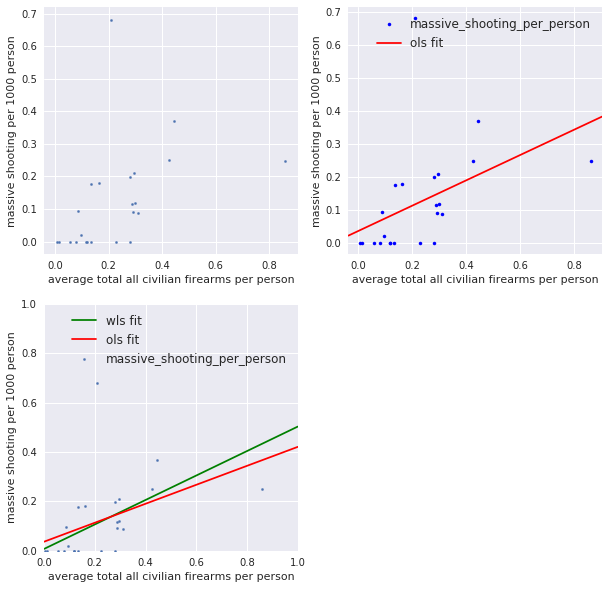

In [215]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(221)
# plt.subplot(221)
plt.scatter(df_['average_total_all_civilian_firearms_per_person'],df_['massive_shooting_per_person'],s=5)
plt.xlabel('average total all civilian firearms per person')
plt.ylabel('massive shooting per 1000 person')

ax = fig.add_subplot(222)
plt.plot(df_['average_total_all_civilian_firearms_per_person'],df_['massive_shooting_per_person'],'b.')
abline_plot(model_results=mod_ols,label='ols fit',ax=ax,c='red')
plt.xlabel('average total all civilian firearms per person')
plt.ylabel('massive shooting per 1000 person')
plt.legend(fontsize=12)

ax = plt.subplot(223)
abline_plot(ax=ax,model_results=mod_wls,label='wls fit',color='green')
abline_plot(model_results=mod_ols,label='ols fit',ax=ax,c='red')

plt.scatter(df_['average_total_all_civilian_firearms_per_person'],df_['massive_shooting_per_person'],s=5)

plt.xlabel('average total all civilian firearms per person')

plt.ylabel('massive shooting per 1000 person')
plt.xlabel('average total all civilian firearms per person')
plt.ylabel('massive shooting per 1000 person')
plt.legend(fontsize=12)

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

In [ ]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

In [ ]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings